# The Country Battle. Who has better taste in music?


<img src="https://cdn.boldomatic.com/content/post/N4z7Yw/Shhh-do-you-hear-that-It-s-the-sound-of-my-music-t?size=800" alt="Music Taste" width="400"/>


**Collaborators:**
- Minerva liste
- Kevin Forster
- Yazan Masarweh

**Paper contents:**
- Introduction to the analysis
- Data sources
- Questions to answer
- Insights
- Possible further questions and improvements

## Introduction

The project centers around the analysis of music taste of the three team members' countries:
- **Spain**
- **Switzerland**
- **Jordan**

The idea is to be able to classify the music *style* of each country by exploring and analysing the different countries' top of the charts artists with the aim of being able to answer which country has better taste in music.

After narrowing down the top 50 artist of each country, start exploring individual tracks for each artist based on the different data sources we were able to acquire. Spotify being the main source of track information as they have ['Spotify Audio Features'](https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/) where they classify individual tracks by different metrics that describe each track.

Once the necessary information has been gathered, the application of data analysis though python and its associated libraries made way to our insights and possible further questions and improvements.




## Data sources

### Top of the charts information

Before proceeding with exploration we aimed to gather the top of the charts artisit of each country.

This was achieved by narrowing down multiple music chart API's such as Deezer, Spotify, and last.fm. The latter was the one we opted to connect and request the necessary data.

<img style="float: left;" src="https://www.muyseguridad.net/wp-content/uploads/2016/09/M%C3%A1s-de-40-millones-de-contrase%C3%B1as-de-Last.fm-fueron-filtradas-en-2012.jpg" alt="last.fm" width="200"/>

**Last.fm API call**

In [6]:
# COUNTRY CHART
def chart_list_artist(country):    

    headers = {'user-agent': 'Dataquest'}
    payload = {'api_key': API_KEY,
        'method': 'geo.getTopArtists',
        'format': 'json',
        'country': country
    }
    r = requests.get('http://ws.audioscrobbler.com/2.0/', headers=headers, params=payload)
    result=r.json()

    country_list=[]
    for i in range (len(result['topartists']['artist'])):
                    country_list.append(result['topartists']['artist'][i]['name'])
    df=pd.DataFrame(country_list)
        
    return df

Top 20 artists by country (*for illustration purposes*)

In [71]:
top_20

,artist,country,artist,country,artist,country
0,Radiohead,Spain,Coldplay,Switzerland,Lana Del Rey,Jordan
1,David Bowie,Spain,Queen,Switzerland,Pink Floyd,Jordan
2,Kanye West,Spain,David Bowie,Switzerland,Queen,Jordan
3,Coldplay,Spain,The Beatles,Switzerland,Coldplay,Jordan
4,Tame Impala,Spain,Radiohead,Switzerland,The Weeknd,Jordan
5,Daft Punk,Spain,Ed Sheeran,Switzerland,Sia,Jordan
6,Queen,Spain,Adele,Switzerland,Eminem,Jordan
7,The Beatles,Spain,The Rolling Stones,Switzerland,David Bowie,Jordan
8,Drake,Spain,Red Hot Chili Peppers,Switzerland,Adele,Jordan
9,The Weeknd,Spain,Pink Floyd,Switzerland,Radiohead,Jordan


### Track information

After being able to extract the top artists by country, we needed to gather track information in order to move forward with our analysis.

As mentioned earlier, Spotify's API was our initial source for track information but unfortunately we were not able to extract a significant amount of tracks that could cover the top of chart artist while giving significant insights.

After some research we decided to utilize [Kaggle](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db) and found a dataset of approximately 250,000 Spotify tracks with the necessary *audio features* needed to move forward with our analysis.



<img style="float: left;" src="https://149363136.v2.pressablecdn.com/wp-content/uploads/2017/03/Kaggle-logo.png" alt="last.fm" width="200"/>

#### Spotify Audio Features

Sample of the dataset

In [ ]:
spotify_features.iloc[:, 4:].head()

<table><tr>
<td> <img src="https://developer.spotify.com/assets/audio/acousticness.png" alt="acousticness" style="width: 400px;"/> </td>
<td> <img src="https://developer.spotify.com/assets/audio/danceability.png" alt="danceability" style="width: 400px;"/> </td>
<td> <img src="https://developer.spotify.com/assets/audio/energy.png" alt="energy" style="width: 400px;"/> </td>
</tr></table>

<table><tr>
<td> <img src="https://developer.spotify.com/assets/audio/instrumentalness.png" alt="instrumentalness" style="width: 400px;"/> </td>
<td> <img src="https://developer.spotify.com/assets/audio/liveness.png" alt="liveness" style="width: 400px;"/> </td>
<td> <img src="https://developer.spotify.com/assets/audio/loudness.png" alt="loudness" style="width: 400px;"/> </td>
</tr></table>

<table><tr>
<td> <img src="https://developer.spotify.com/assets/audio/speechiness.png" alt="speechiness" style="width: 400px;"/> </td>
<td> <img src="https://developer.spotify.com/assets/audio/tempo.png" alt="tempo" style="width: 400px;"/> </td>
<td> <img src="https://developer.spotify.com/assets/audio/valence.png" alt="valence" style="width: 400px;"/> </td>
</tr></table>

##### Spotify Audio Features definitions


**acoustincness:**

A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**danceability:**

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**energy:**

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

**instrumentalness:**

Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**liveness:**

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**loudness:**

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

**speechiness:**

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

**tempo:**

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**valence:**

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

## Data structure

Reviewing the retrieved data, we could clearly identify five entities that we will split in different tables:

* Tracks: description of the song variables
* Artists: list of artists
* Genre: list of genres
* Rankings: top of the charts lists
* Countries: list of countries

The relation between the tables was stablished according to the current data available and the objectives of our analysis. The final structure can be seen in the following ERD:

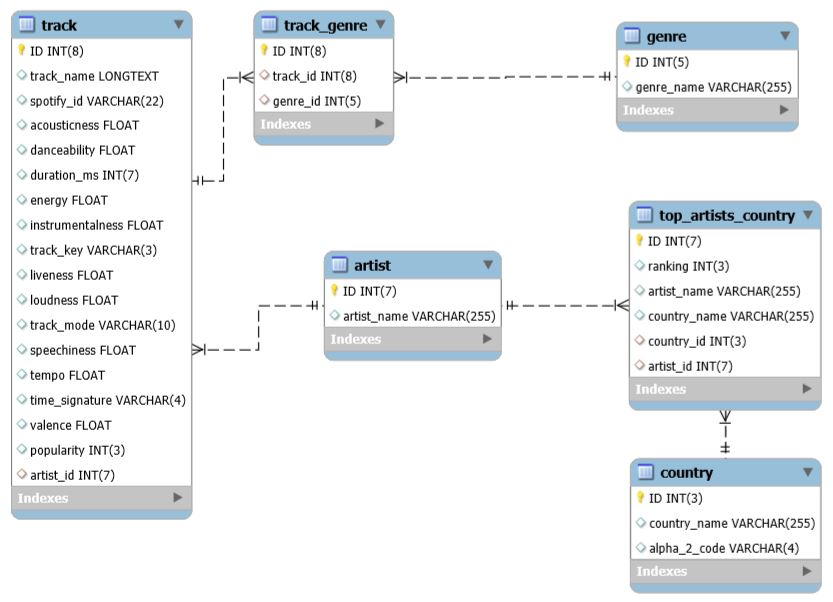

## Data wrangling

Once we had the data, we needed to wrangle it and connect the information retrieved from the two different sources. We started by checking the quality of the data with some basic exploration that revealed both datasets were quite complete and clean.

However, a closer look at the data extracted from Kaggle revealed a lot of duplicated track names. Our fist hypothesis was that there could be different artists naming their songs under the same title, so we went to check on the Spotify ID, which provided a us a unique identifier for each track - artist element:

In [6]:
import pandas as pd
raw_data = pd.read_csv('datasets/ultimate_spotify_tracks_db/SpotifyFeatures.csv')
##Len original CSV
print('Len of original CSV is', len(raw_data))
print('Number of unique songs on CSV is', len(raw_data.track_id.unique()))

Len of original CSV is 232725
Number of unique songs on CSV is 176774


Some further exploration allowed us to see that a a song could be considered as belonging to several genres, and that when that was the case it was repeated in several rows in the CSV. In order to check if that was the only reason causing duplicates in our original dataset, we dropped the colunm containing the genre information and checked at the lenght again. 

In [7]:
## Drop genre column and drop duplicates after not considering that column
raw_data_no_genre = raw_data[raw_data.columns[1:]].copy()
raw_data_no_genre = raw_data_no_genre.drop_duplicates()
print('Number of unique songs without considering the genre is', len(raw_data_no_genre))

Number of unique songs without considering the genre is 191056


Unfortunately, the remaining list was still longer than the list of unique songs, so we had to look for our source of duplicates somewhere else. Since the rest of attributes should be always the same for the same unique song according to our initial assumptions (i.e.: a song shouldn't have two different 'energy'values), we decided to perform some further inspection.

To do so, we created a list of the IDs that were still repeated in our last dataframe and performed a manual inspection on that subset of songs. Our conclusion were:

* The songs with repeated records on the CSV were 12639, which accounted for less than 5,5% of the original dataset.
* The field that changed between the records, thus making them unique, was the popularity value. From what we could see, the same song changed its popularity value depending on the genre classification.
* The rest of the song parameters were the same for all records of the same song.
* After some consideration on the way to proceed, we decide to unify these records and calculate the mean popularity among the different records of the same track, because: a) In case we needed these tracks for our analysis, all the other parameters could still be considered valid. b) Since we would keep a list of the tracks that were being modified, we would be able to control how these changes in the data data may affect/bias our insight (if they did)

Moreover, in terms of field values normalization, we unify the values 'Children's Music' and 'Children’s Music' in genre column.

Once this changes were done, we used the CSV to seed the following tables in the database: track, artist, genre, track_genre.

Regarding the second dataset, which was extracted from Last FM, we performed a matching process by artist name with the artist table from our database, since we could not do it by any existent unique ID. This process revealed that we needed to take two different actions in order to achieve a complete match:

* Change some artist's names in the LastFM dataset in order to match the name spelling of the values already in our database.
* Add some artists to our database that were not previously in our table.

After that, we could push all the information to the ´top_artists_country´ table. Additionally, we created a ´country´ table to store those values. 

## Questions to answer

In order to start getting and idea for the data, we had to clean, and dig deeper to gain a sense for it.

#### Drop some columns to get just metric ones

In [75]:
for i in df1.columns[4:]:
    print(i)

popularity
acousticness
danceability
duration_ms
energy
instrumentalness
liveness
loudness
speechiness
tempo
valence


#### Frequency distribution of all metric fields

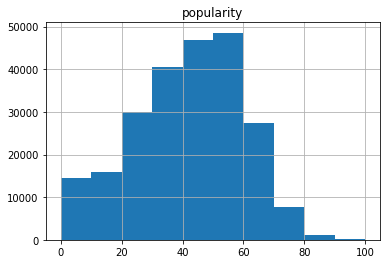

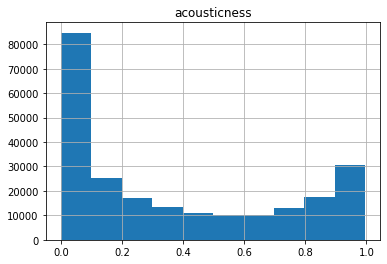

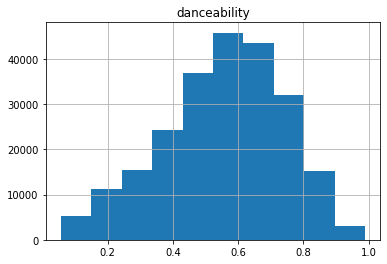

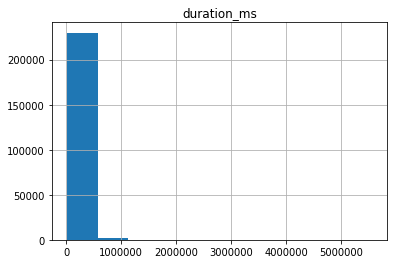

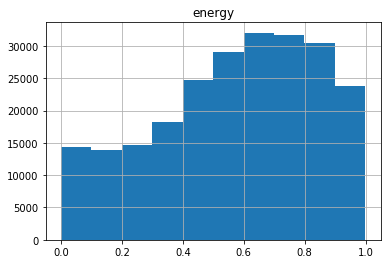

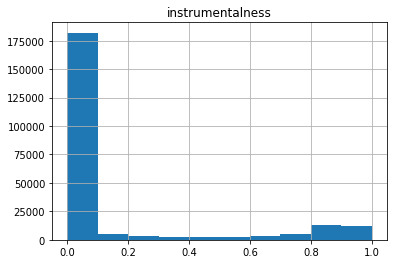

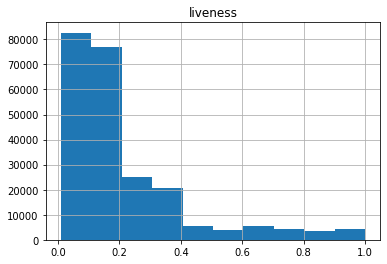

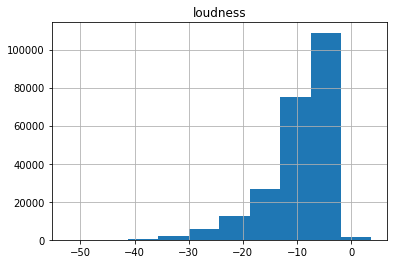

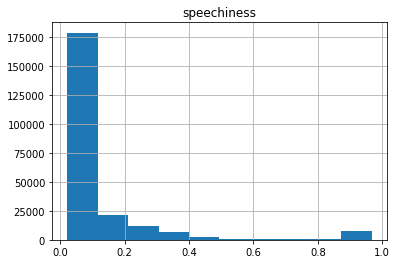

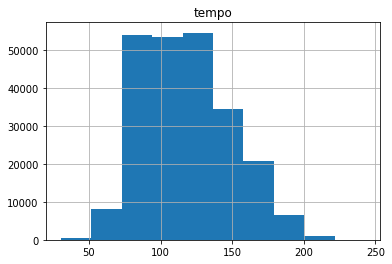

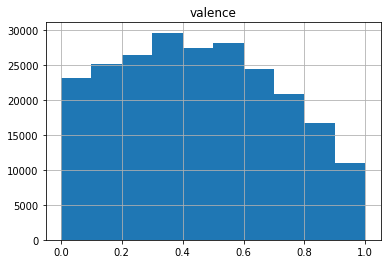

In [77]:
for i in df1.columns[4:]:
    df1.hist(i)

#### Description of all metric fields

In [79]:
df1.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


## All possible correlations

In [86]:
df1_corr

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.381295,0.256564,0.002348,0.248922,-0.210983,-0.167995,0.363011,-0.151076,0.081039,0.060076
acousticness,-0.381295,1.000000,-0.364546,0.011203,-0.725576,0.316154,0.069004,-0.690202,0.150935,-0.238247,-0.325798
danceability,0.256564,-0.364546,1.000000,-0.125781,0.325807,-0.364941,-0.041684,0.438668,0.134560,0.021939,0.547154
duration_ms,0.002348,0.011203,-0.125781,1.000000,-0.030550,0.076021,0.023783,-0.047618,-0.016171,-0.028456,-0.141811
energy,0.248922,-0.725576,0.325807,-0.030550,1.000000,-0.378957,0.192801,0.816088,0.145120,0.228774,0.436771
instrumentalness,-0.210983,0.316154,-0.364941,0.076021,-0.378957,1.000000,-0.134198,-0.506320,-0.177147,-0.104133,-0.307522
liveness,-0.167995,0.069004,-0.041684,0.023783,0.192801,-0.134198,1.000000,0.045686,0.510147,-0.051355,0.011804
loudness,0.363011,-0.690202,0.438668,-0.047618,0.816088,-0.506320,0.045686,1.000000,-0.002273,0.228364,0.399901
speechiness,-0.151076,0.150935,0.134560,-0.016171,0.145120,-0.177147,0.510147,-0.002273,1.000000,-0.081541,0.023842
tempo,0.081039,-0.238247,0.021939,-0.028456,0.228774,-0.104133,-0.051355,0.228364,-0.081541,1.000000,0.134857


After some research, we decided to classify correlations under six buckets:
- **Positive correlation**
    - Strong positive correlation from 1.0 to 0.5
    - Moderate positive correlation from 0.5 to 0.3
    - Weak positive correlation from 0.3 ro 0.1


- **Negative correlation**
    - Strong negative correlation from -1.0 to -0.5
    - Moderate negative correlation from -0.5 to -0.3
    - Weak negative correlation from -0.3 ro -0.1

## Strong positive correlations from 1.0 to 0.5

In [87]:
df1_corr[(df1_corr >= 0.5) & (df1_corr <= 1.0)]

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acousticness,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
danceability,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.547154
duration_ms,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.816088,NaN,NaN,NaN
instrumentalness,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
liveness,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.510147,NaN,NaN
loudness,NaN,NaN,NaN,NaN,0.816088,NaN,NaN,1.000000,NaN,NaN,NaN
speechiness,NaN,NaN,NaN,NaN,NaN,NaN,0.510147,NaN,1.000000,NaN,NaN
tempo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


## Moderate positive correlations from 0.5 to 0.3

In [88]:
df1_corr[(df1_corr >= 0.3) & (df1_corr <= 0.5)]

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.363011,NaN,NaN,NaN
acousticness,NaN,NaN,NaN,NaN,NaN,0.316154,NaN,NaN,NaN,NaN,NaN
danceability,NaN,NaN,NaN,NaN,0.325807,NaN,NaN,0.438668,NaN,NaN,NaN
duration_ms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy,NaN,NaN,0.325807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.436771
instrumentalness,NaN,0.316154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
liveness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loudness,0.363011,NaN,0.438668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.399901
speechiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tempo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Weak positive correlations from 0.3 to 0.1

In [89]:
df1_corr[(df1_corr >= 0.1) & (df1_corr <= 0.3)]

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,NaN,NaN,0.256564,NaN,0.248922,NaN,NaN,NaN,NaN,NaN,NaN
acousticness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.150935,NaN,NaN
danceability,0.256564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.134560,NaN,NaN
duration_ms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy,0.248922,NaN,NaN,NaN,NaN,NaN,0.192801,NaN,0.145120,0.228774,NaN
instrumentalness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
liveness,NaN,NaN,NaN,NaN,0.192801,NaN,NaN,NaN,NaN,NaN,NaN
loudness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.228364,NaN
speechiness,NaN,0.150935,0.134560,NaN,0.145120,NaN,NaN,NaN,NaN,NaN,NaN
tempo,NaN,NaN,NaN,NaN,0.228774,NaN,NaN,0.228364,NaN,NaN,0.134857


## Strong negative correlations from -1.0 to -0.5

In [90]:
df1_corr[(df1_corr >= -1) & (df1_corr <= -0.5)]

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acousticness,NaN,NaN,NaN,NaN,-0.725576,NaN,NaN,-0.690202,NaN,NaN,NaN
danceability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_ms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy,NaN,-0.725576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instrumentalness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.506320,NaN,NaN,NaN
liveness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loudness,NaN,-0.690202,NaN,NaN,NaN,-0.50632,NaN,NaN,NaN,NaN,NaN
speechiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tempo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Moderate negative correlations from -0.5 to -0.3

In [91]:
df1_corr[(df1_corr >= -0.5) & (df1_corr <= -0.3)]

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,NaN,-0.381295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acousticness,-0.381295,NaN,-0.364546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.325798
danceability,NaN,-0.364546,NaN,NaN,NaN,-0.364941,NaN,NaN,NaN,NaN,NaN
duration_ms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy,NaN,NaN,NaN,NaN,NaN,-0.378957,NaN,NaN,NaN,NaN,NaN
instrumentalness,NaN,NaN,-0.364941,NaN,-0.378957,NaN,NaN,NaN,NaN,NaN,-0.307522
liveness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loudness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speechiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tempo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Weak negative correlations from -0.3 to -0.1

In [92]:
df1_corr[(df1_corr >= -0.3) & (df1_corr <= -0.1)]

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,NaN,NaN,NaN,NaN,NaN,-0.210983,-0.167995,NaN,-0.151076,NaN,NaN
acousticness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.238247,NaN
danceability,NaN,NaN,NaN,-0.125781,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_ms,NaN,NaN,-0.125781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.141811
energy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instrumentalness,-0.210983,NaN,NaN,NaN,NaN,NaN,-0.134198,NaN,-0.177147,-0.104133,NaN
liveness,-0.167995,NaN,NaN,NaN,NaN,-0.134198,NaN,NaN,NaN,NaN,NaN
loudness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speechiness,-0.151076,NaN,NaN,NaN,NaN,-0.177147,NaN,NaN,NaN,NaN,NaN
tempo,NaN,-0.238247,NaN,NaN,NaN,-0.104133,NaN,NaN,NaN,NaN,NaN


# Country analysis by audio features

# Spain

### **Average metric profile of Spain accross 6 audio features**

When analyzing the songs of the top 50 artists in Spain, we can see that the features that define them the most are danceability and energy, meaning that the music Spanish people listen the most tends to be fast, loud, with a high tempo and strong rhythm.

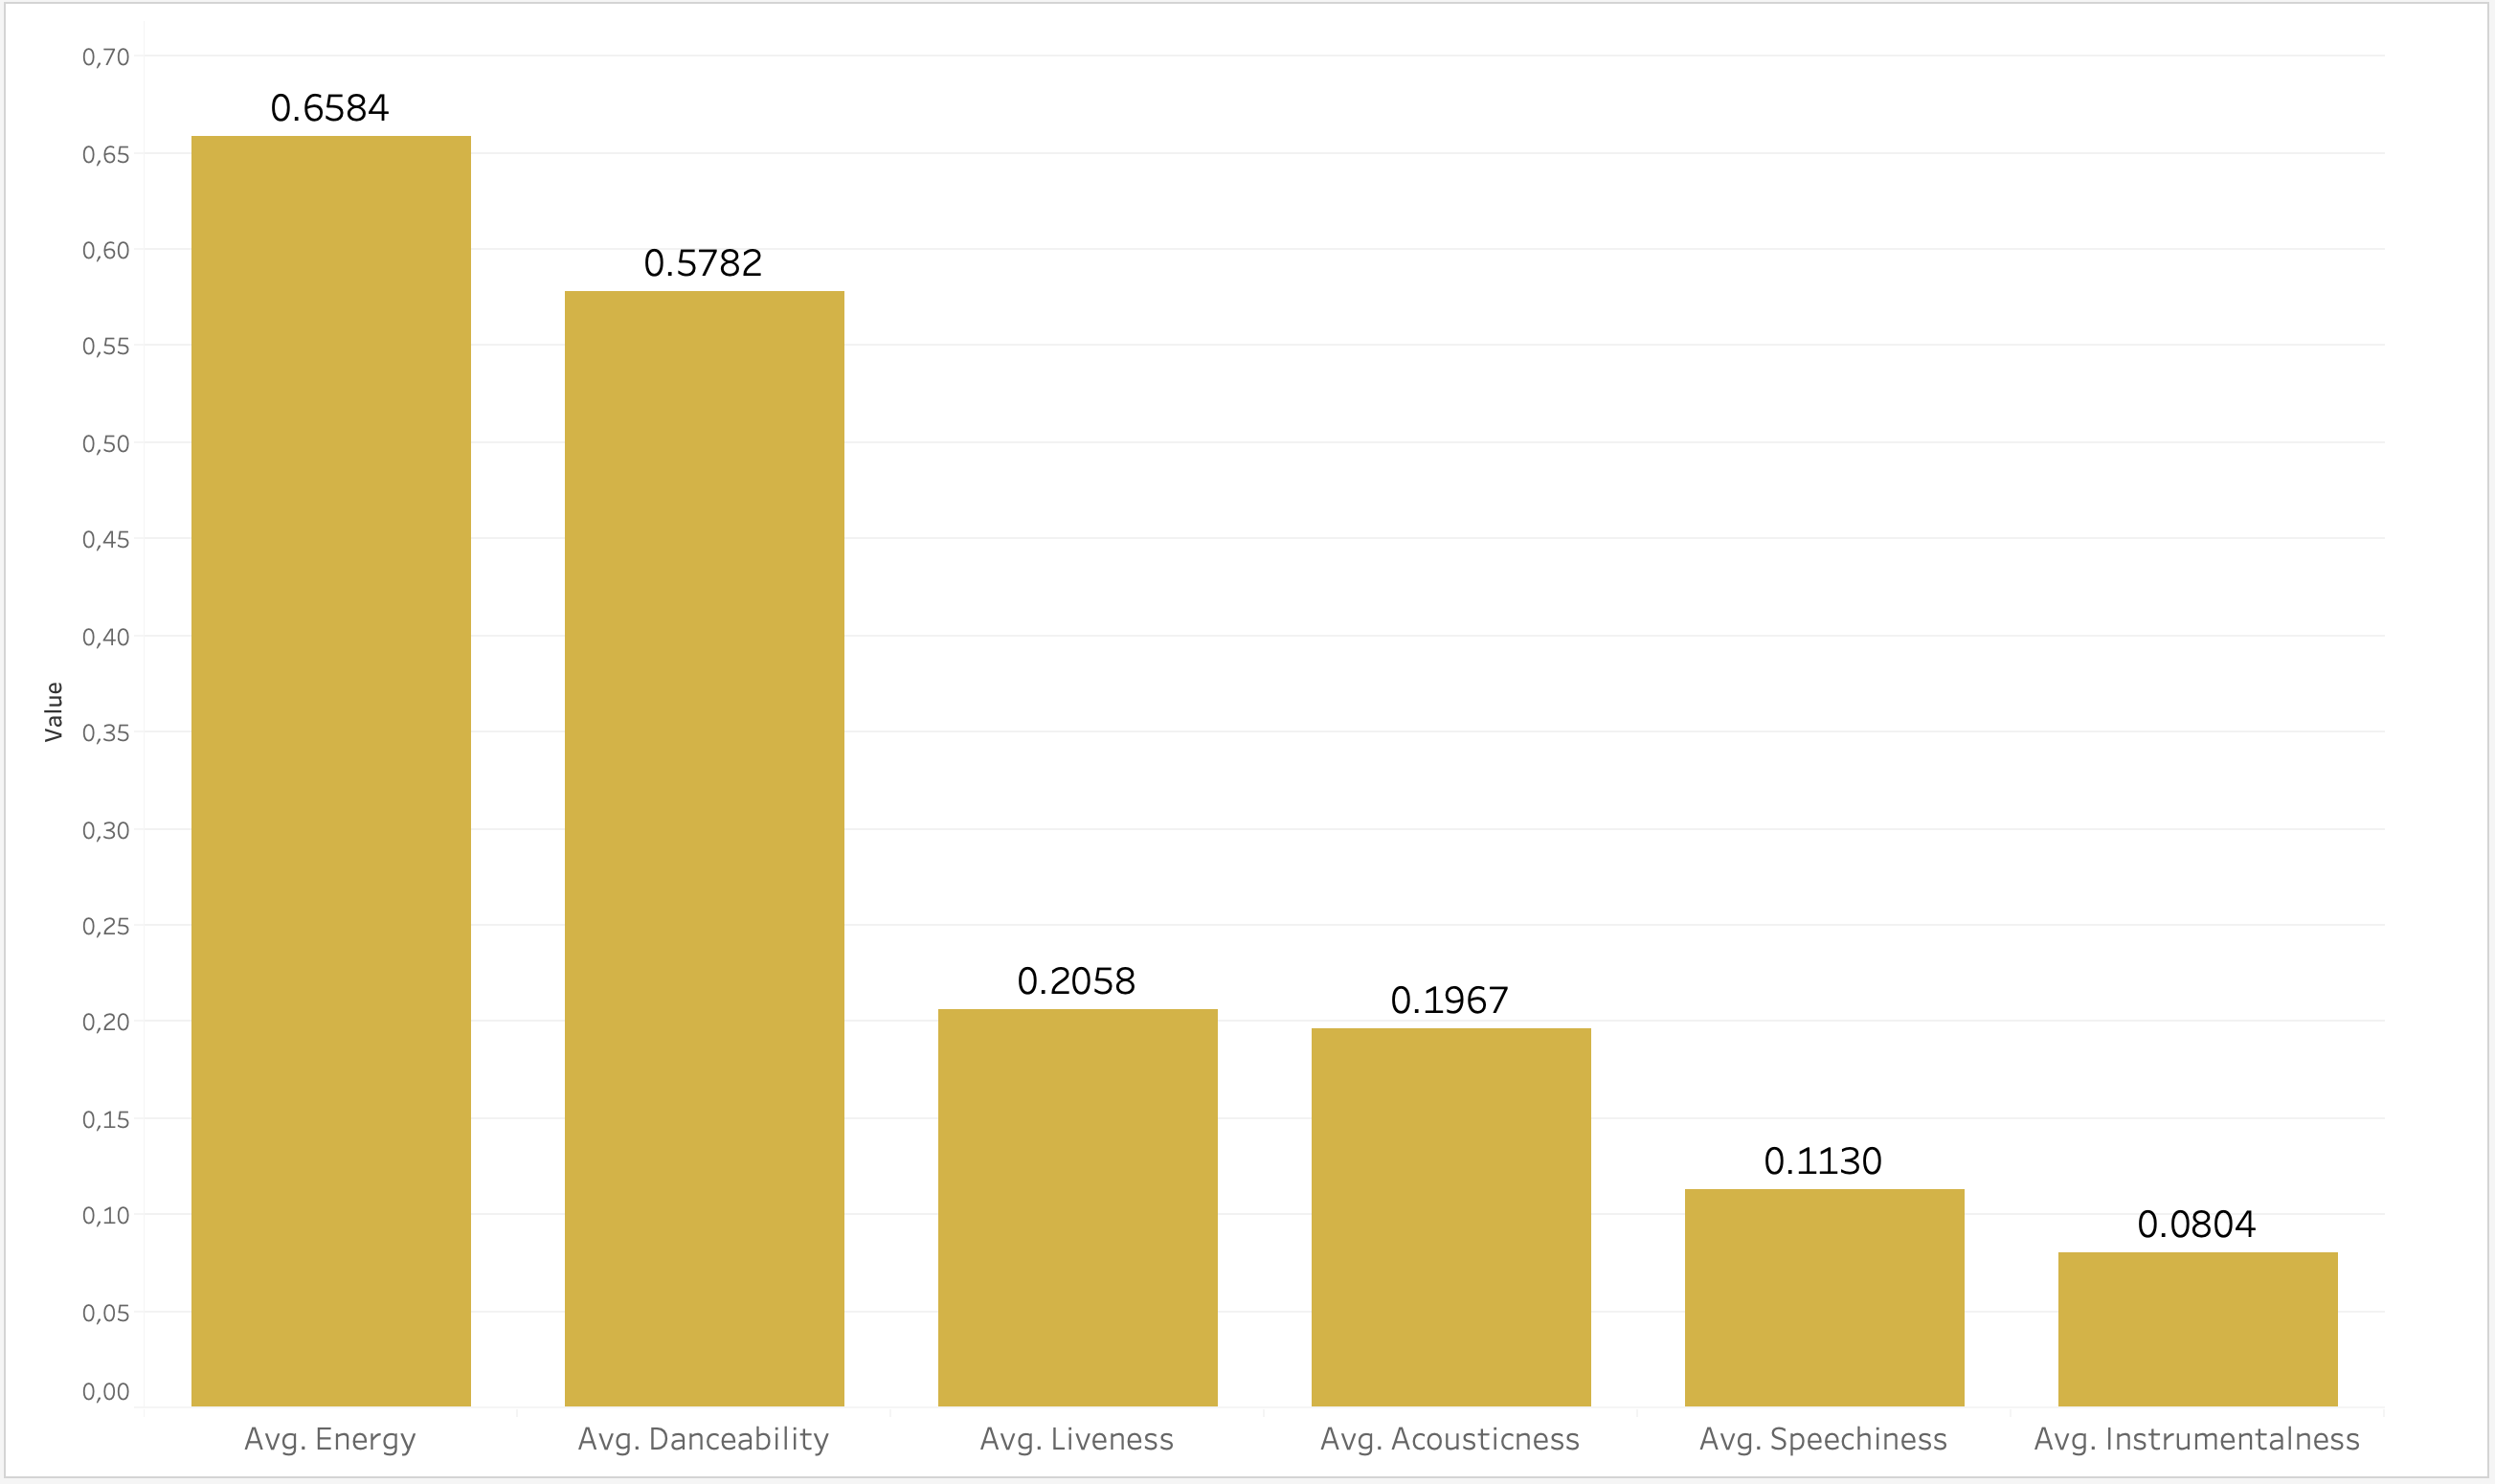

### **Top five artists:**

The top 5 artists in the Spanish list are:

- David Bowie
- Radiohead
- Coldplay
- Queen
- The Rolling Stones

However, when we tried to stablish a relationship among these artists' popularity and their music characteristics, no specific tendencies were shown:


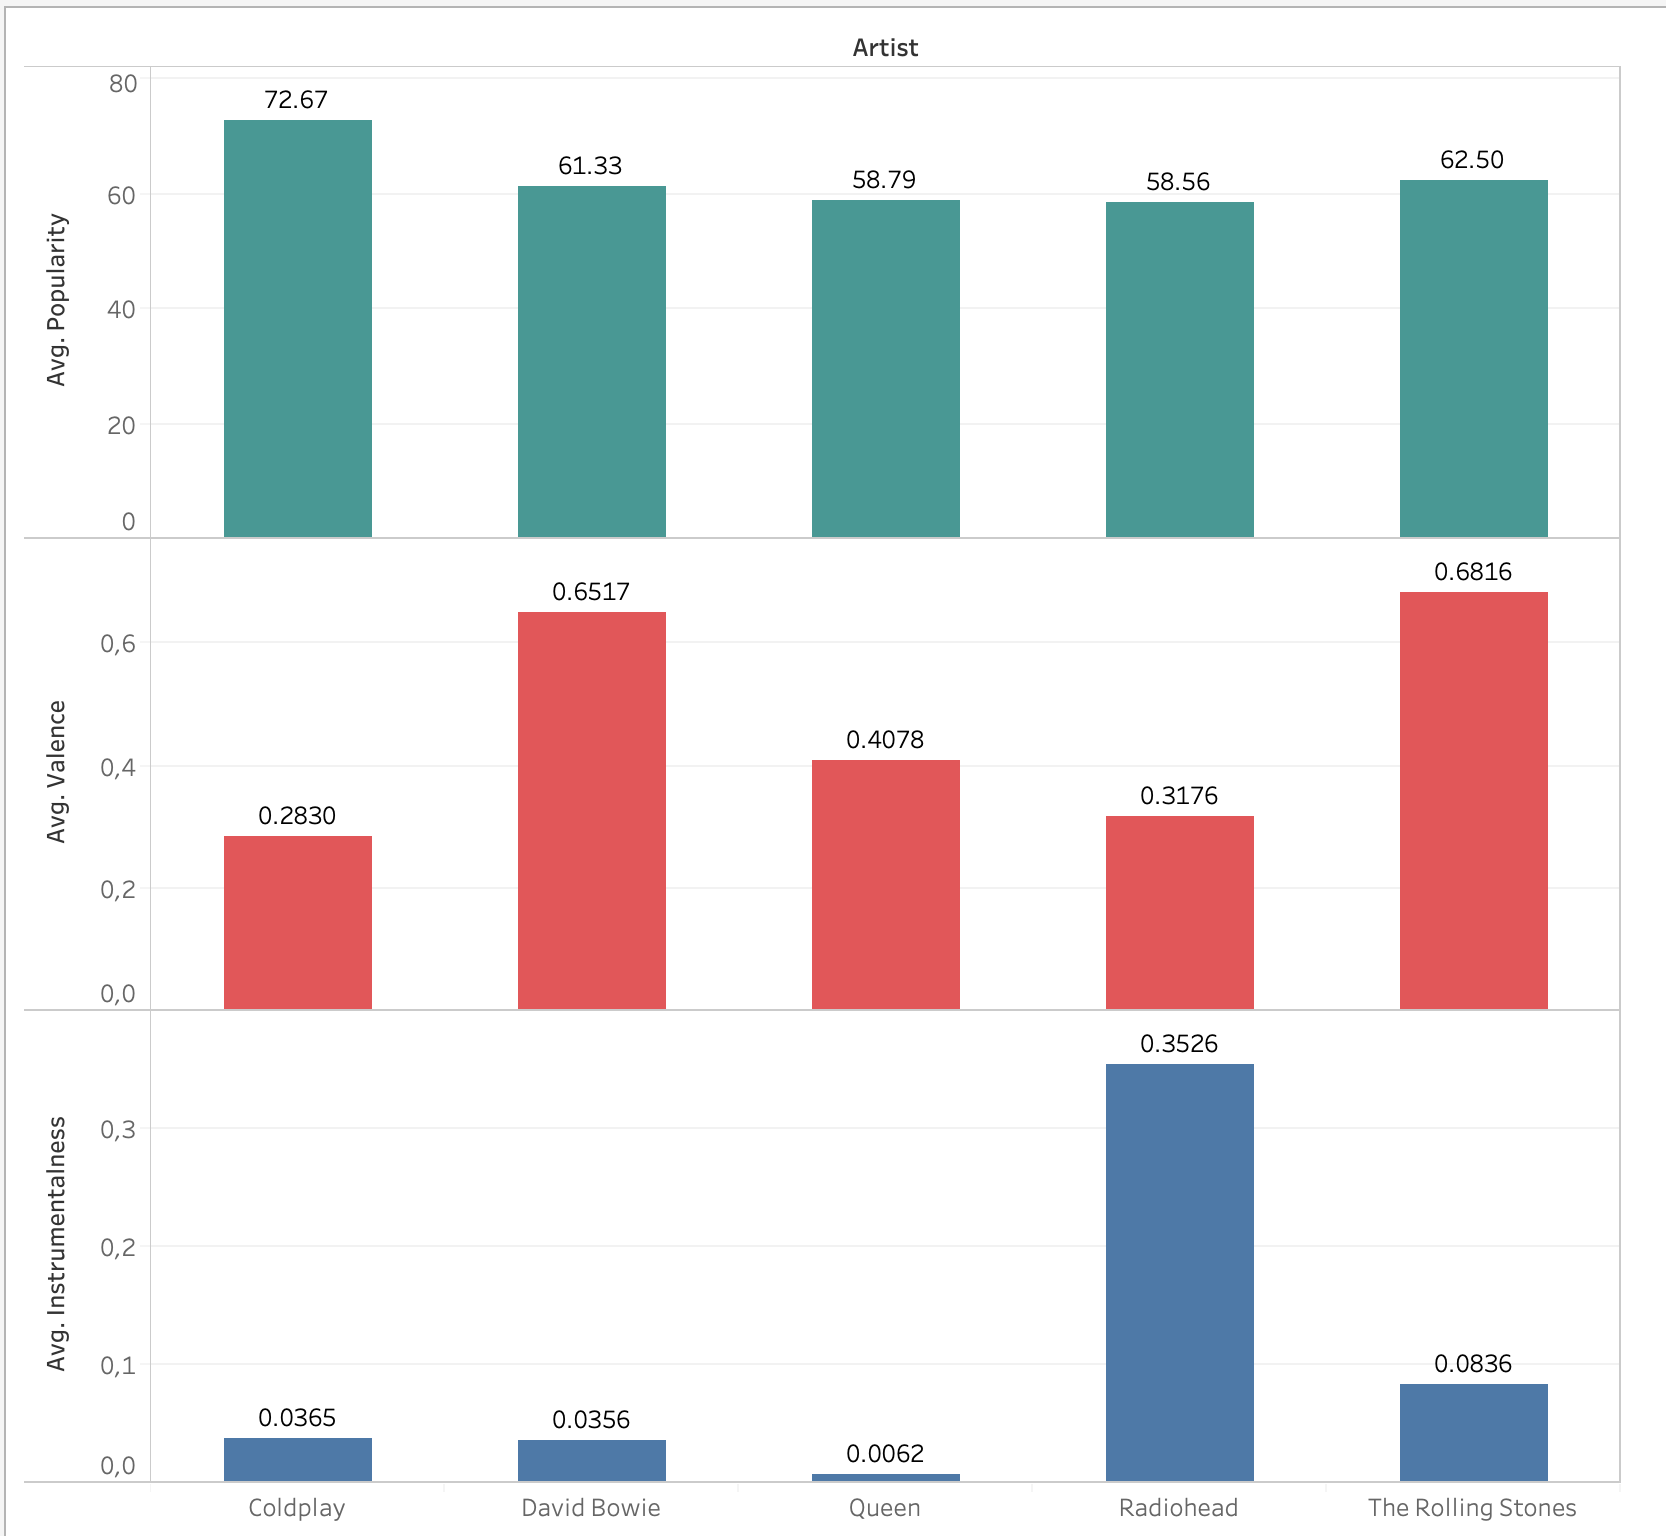

### **Popularity vs. Valence: Scatter Plot**

Plotting the popularity rating vs valence of all the songs in the list doesn't reveal significant insights into the relationship between the two features either. Similar outputs appeared when comparing other music features to the popularity of the songs.

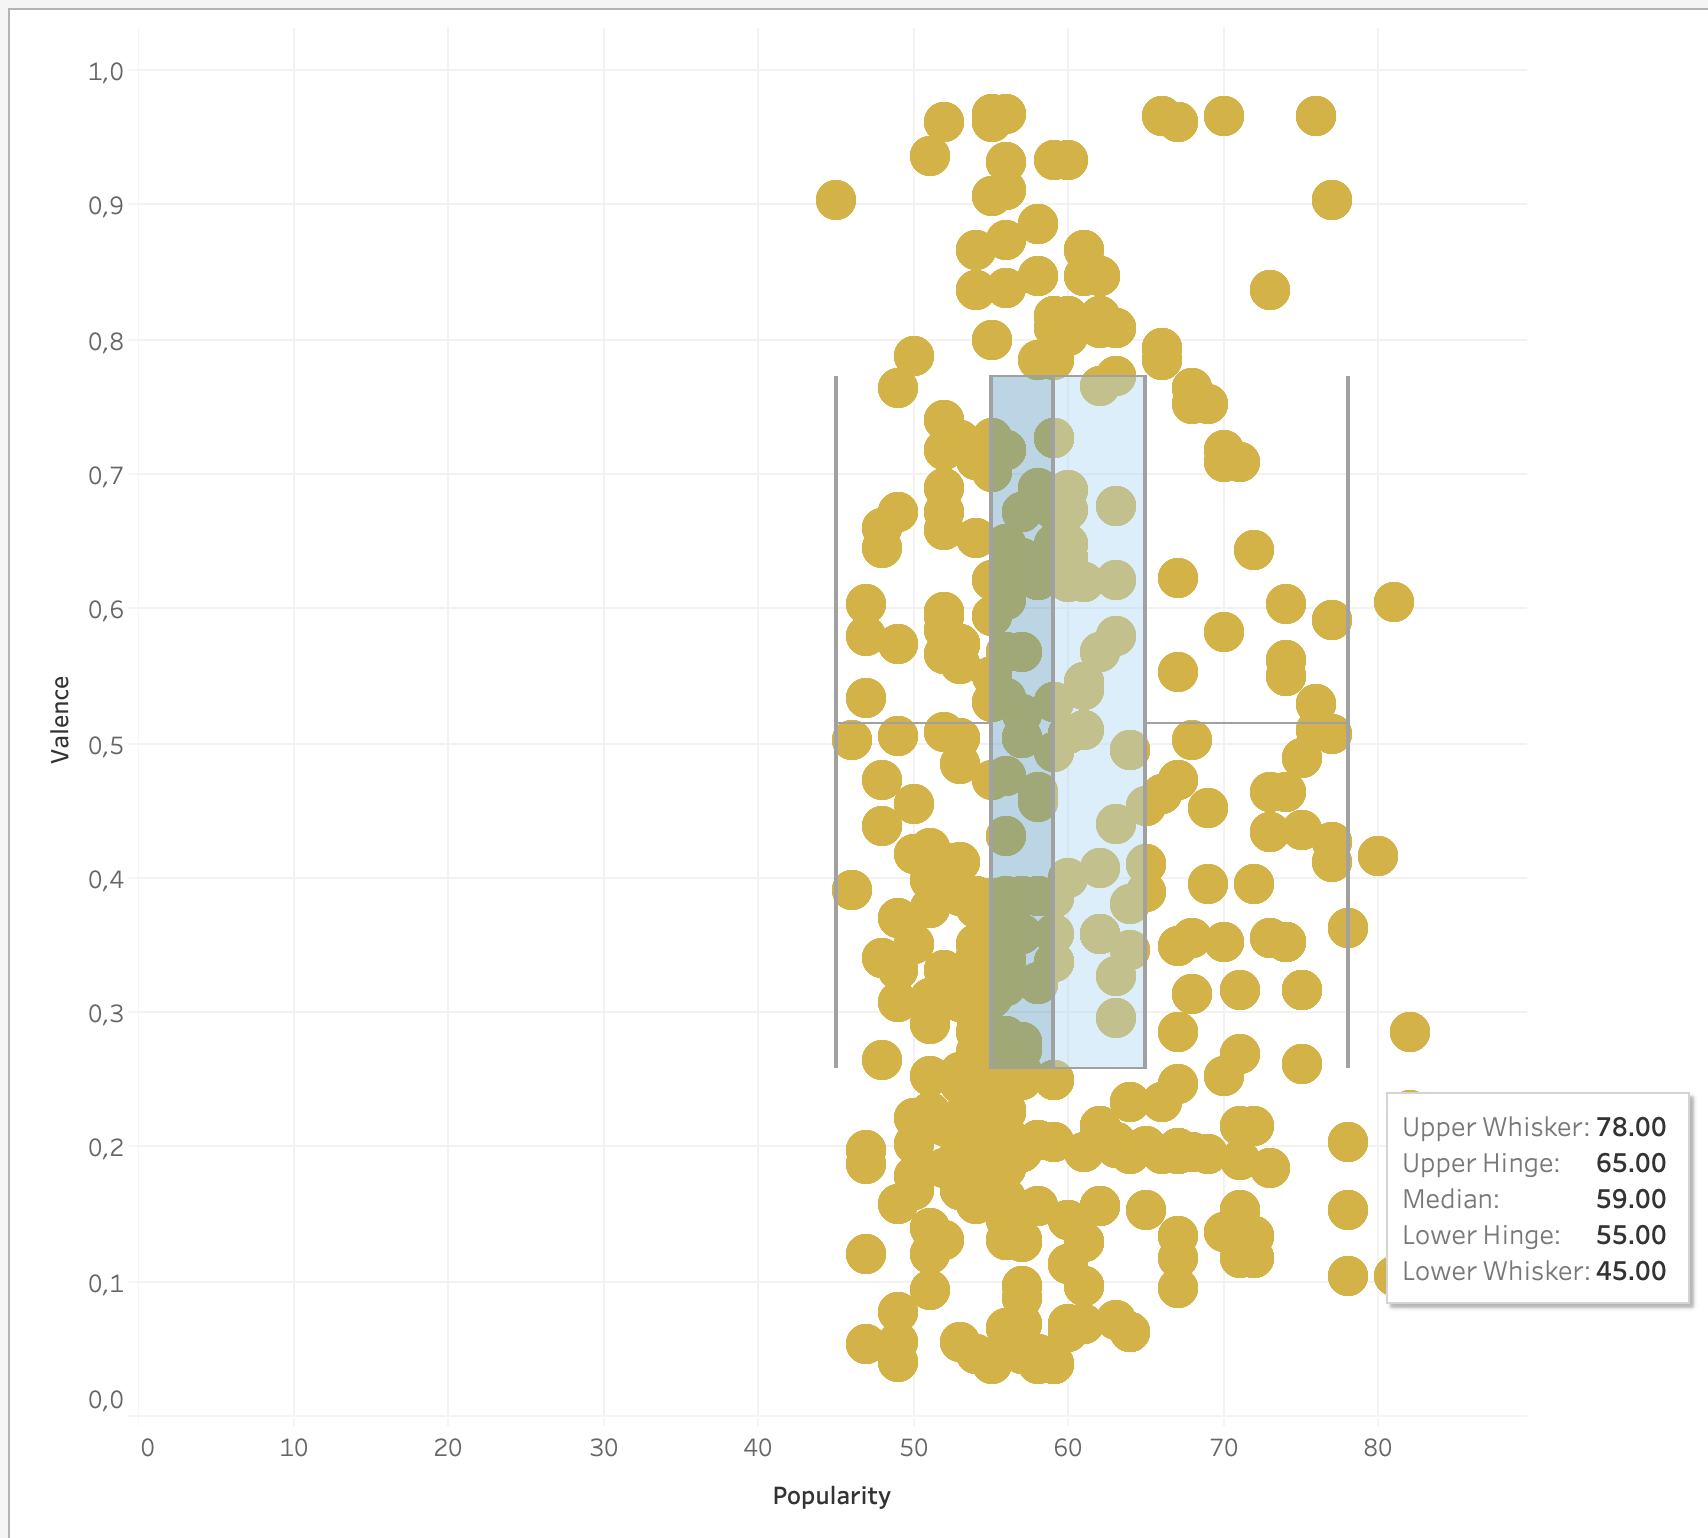

# Switzerland

### **Average metric profile of Switzerland accross 6 audio features**

By averaging all songs by artists in Switzerland's top artists we can conclude that music  is energetic, danceable as well as acoustic. Also Liveness seems to be important for the people in Switzerland.

<img style="float: centre;" src="images/country_profiles/switz_mean_profile.png" width="600"/>

### **Top five artists:**
- Coldplay
- David Bowie
- Queen
- Radiohead
- The Beatles



<img style="float: centre;" src="images/country_profiles/switz_bar_profile.png" width="600"/>

### **Popularity vs. Valence: Scatter Plot**

Plotting the populatiry rating vs valence of all songs realted toJordan's music taset reveals no signifcant insights into the relationship between the two features.

<img style="float: centre;" src="images/country_profiles/switz_pop_val.png" width="600"/>

## Switzerland compared to Spain

Once the style of music is analysed of different country it is great to compare them with each other. So, how big is the difference between these values? The chart below is the result of what happens when the mean of each of a country's features are subtracted from an ohter's country.

Clearly we can see that energy and speechiness are the distinctness features of Spain, whereas Switzerland is more into acousticness and instrumentalness. This outcome is not a big surprise as the values of energy, liveness and danceability also match perfectly with the image of Spain. 

<img style="float: centre;" src="images/country_profiles/spain_vs_switzerland.png" width="600"/>

# Jordan

### **Average metric profile of Jordan accross 6 audio features**

By averaging all songs by artists in Jordan's top artists we can infer that music that is energetic and danceable appeals more to Jordan than ones with a focus on instrumental parts.

<img style="float: centre;" src="images/country_profiles/jordan_mean_profile.png" width="600"/>

### **Top five artists:**
- Coldplay
- Lana Del Rey
- Pink Floyd
- Queen
- The Weeknd

Studying the top five artists we can also get an insight into their popularity rating in the Jordanian Market.

<img style="float: centre;" src="images/country_profiles/jordan_bar_profile.png" width="600"/>

### **Popularity vs. Valence: Scatter Plot**

Plotting the popularity rating vs valence of all songs related to Jordan's music taste reveals no signifcant insights into the relationship between the two features.

<img style="float: centre;" src="images/country_profiles/jordan_pop_val.png" width="600"/>

# So, which country is better in music?

After we analysed the countries by their different music feature componentes we were not able to get to a final conslusion. Here is an example that shows the comparison of the three countries that does not lead to a conclusion. 

<img style="float: centre;" src="images/country_profiles/country_profile.png" width="600"/>

## Boringness index

Somehow we need to find an answer to our question "which country is better in music?" by creating an equation of the analysed music feature components. Juan De Dios Santos [link]('https://towardsdatascience.com/is-my-spotify-music-boring-an-analysis-involving-music-data-and-machine-learning-47550ae931de') came up with an approach that analysis the boringness of a type of music. So he defined an equation that involves the energy, and danceability feature we learned about already in this paper. Plus two other feature were added: tempo and loudness. The reason why he chose these features is because at a party he would like to have loud music, with a nice tempo that brings out the energy, to get in the mood for dancing. To sum it up, the following function will analyse the boringness of a music is. 

<img style="float: centre;" src="images/boringness/formula_boringness.png" width="600"/>

And according to it, the lowest the score is, the more boring the song is, and the highest the score, the more fun it is. Also, note that energy and danceability are multiplied by 100 because the loudness and tempo values are not in the range 0.0–1.0.

So, we took this formula and calculated the boringness of each song. At the end we want to find out which style of music, analysed by all songs of a country, is less boring than the music from other countries.

## Result

So, at the end we analysed boringness of the songs of each country and put them into a line chart. The diagramm shows a similar line of Spain and Jordan where most songs are around 230-280 of the boringness index. Compared to Switzerland they achieved a higher score. 

<img style="float: centre;" src="images/boringness/boringness_allcountries.png" width="600"/>

To complement the histogram, the mean value of the boringness was computed, and the values are 237.29 for Spain, 236.21 for Jordan and 230.93 to Switzerland. The following plot illustrate this.

<img style="float: centre;" src="images/boringness/boringness_mean.png" width="600"/>

Thus we can conclude that Switzerland have more boring songs than Spain and Jordan and people would rather have Spain music at a party. 